In [3]:
import pandas as pd
import glob


In [10]:
path = "/Users/vishalkumar/Documents/Git-Repo/kumarv/Scripts/AkodoData"
file_list = glob.glob(path + "/*.xlsx")
excl_list = []
for file in file_list:
    #append the sheet named 'Product' into a list
    excl_list.append(pd.read_excel(file, sheet_name='Product'))
excl_merged = pd.DataFrame()

for excl_file in excl_list:
     
    # appends the data into the excl_merged
    # dataframe.
    excl_merged = excl_merged.append(
      excl_file, ignore_index=True)
 
print(excl_merged)

       Data Model Level                    Parent  \
0         Product    L1                       NaN   
1         Product    L1                       NaN   
2         Product    L1                       NaN   
3     Electronics    L2                   Product   
4     Electronics    L2                   Product   
...           ...   ...                       ...   
7172   Sunglasses    L4  Worn Fashion Accessories   
7173   Sunglasses    L4  Worn Fashion Accessories   
7174   Sunglasses    L4  Worn Fashion Accessories   
7175   Sunglasses    L4  Worn Fashion Accessories   
7176   Sunglasses    L4  Worn Fashion Accessories   

                                              Attribute  \
0                                  Prop 65 Warning Text   
1                California State Chemical Warning Text   
2                           Is Prop 65 Warning Required   
3     Third Party Accreditation Symbol on Product Pa...   
4                                          Warranty URL   
...      

/var/folders/hn/mtn160v16kq8zlz1vr6zxzdh0000gn/T/ipykernel_19534/3900783176.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  excl_merged = excl_merged.append(


In [11]:
print(excl_merged.columns)

Index(['Data Model', 'Level', 'Parent', 'Attribute', 'Requirement Level',
       'Conditional Requirement', 'Acceptable Values', 'Example Values',
       'Closed List?', 'Multi-Select?', 'Operations Direction',
       'Parent Attribute Name', 'Acceptable Units', 'Minimum Required Entries',
       'Recommended No. of Entries', 'Min Word Count',
       'Recommended Word Length', 'Definition', 'Data Type', 'Min Char',
       'Max Char', 'Precision', 'Display Name', 'Schema Key',
       'Validation Instructions', 'L2 Header', 'Destination Attribute 1',
       'Destination Resource Tier 1', 'Destination Transformations 1',
       'Destination Attribute 2', 'Destination Resource Tier 2',
       'Destination Transformations 2', 'Destination Attribute 3',
       'Destination Resource Tier 3', 'Destination Transformations 3',
       'Restrict Editing For', 'Destination Attribute 4',
       'Destination Resource Tier 4', 'Destination Transformations 4',
       'Destination Attribute 5', 'Destina

In [13]:
#keep rows which have value 'Required' in the 'Requirement Level' column and save it in rdf
rdf = excl_merged[excl_merged['Requirement Level'] == 'Required']
print(rdf)

                Data Model Level                    Parent  \
1                  Product    L1                       NaN   
2                  Product    L1                       NaN   
5              Electronics    L2                   Product   
7     Computer Accessories    L3               Electronics   
8     Computer Accessories    L3               Electronics   
...                    ...   ...                       ...   
7161            Sunglasses    L4  Worn Fashion Accessories   
7162            Sunglasses    L4  Worn Fashion Accessories   
7163            Sunglasses    L4  Worn Fashion Accessories   
7174            Sunglasses    L4  Worn Fashion Accessories   
7175            Sunglasses    L4  Worn Fashion Accessories   

                                   Attribute Requirement Level  \
1     California State Chemical Warning Text          Required   
2                Is Prop 65 Warning Required          Required   
5                       Has Written Warranty          Req

In [14]:
#print all unique values in column 'Attribute'
print(rdf['Attribute'].unique())

['California State Chemical Warning Text' 'Is Prop 65 Warning Required'
 'Has Written Warranty' 'Brand' 'Short Description' 'Main Image URL'
 'Product Long Description' 'Product Secondary Image URL'
 'Multipack Quantity' 'Count Per Pack' 'Total Count' 'Retail Packaging'
 '-Product Net Content' '-Product Net Content UOM'
 'Product Net Content Parent' 'Screen Size' 'Product Name' 'Condition'
 'Assembled Product Weight' 'Assembled Product Height'
 'Assembled Product Length' 'Assembled Product Width' 'Color'
 'Color Category' 'Small Parts Warning Code' 'Cable Length'
 'Electronic End Connection 1' 'Electronic End Connection 2'
 'Recommended Location' 'Battery Capacity' 'Volts'
 'Device-Specific Electronics Charger Type' 'Cell Phone Case Type'
 'Compatible Brands' 'Compatible Models' 'Drop Test Rating'
 'Inputs & Outputs' 'Power Type' '-Input/Output Type'
 '-Input/Output Quantity' '-Input/Output Direction' 'Headphone Type'
 'Headphone Style' 'Video Game Accessory Type' 'Video Game Platform'

In [17]:
#save occurence of all unique values in column 'Attribute' in a new df odf
odf = rdf['Attribute'].value_counts().rename_axis('Attribute').reset_index(name='counts')
#save odf to csv
odf.to_csv('RequiredAttributesOccurence.csv', index=False)

<AxesSubplot:xlabel='Attribute'>

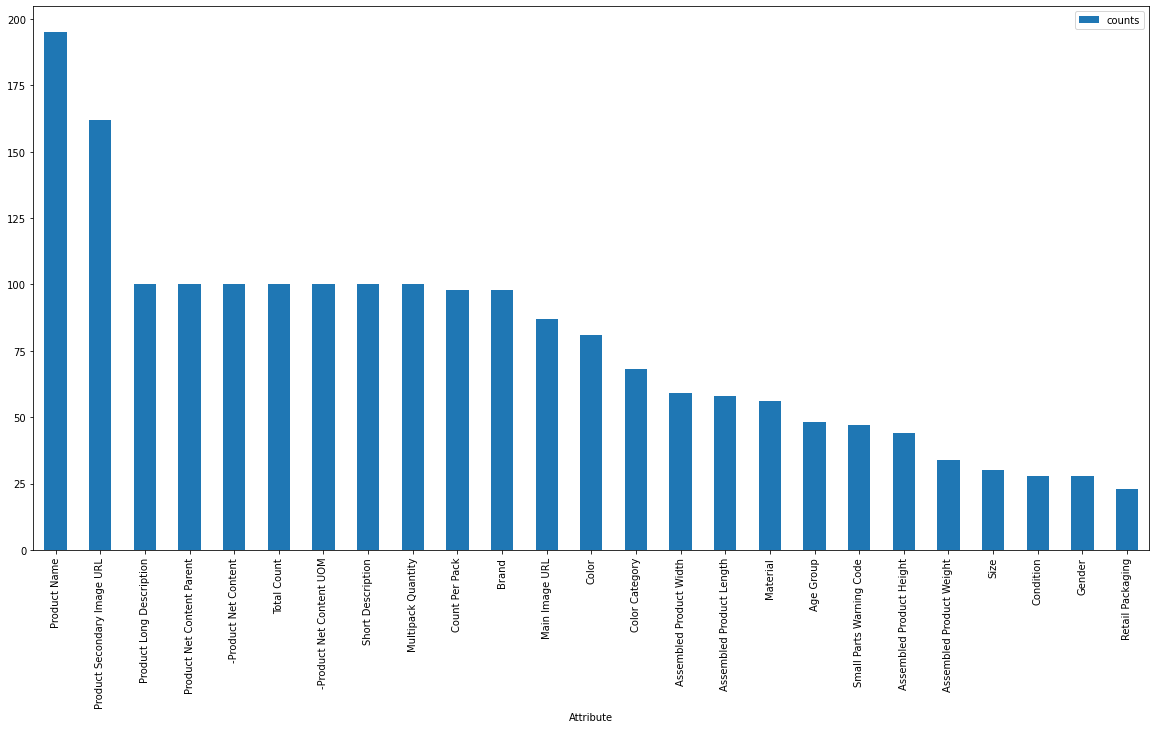

In [23]:
import matplotlib
#plot a bar graph of the odf in a wide format of top 25 attributes, with attribute labels rotated horizontally
odf[:25].plot.bar(x='Attribute', y='counts', rot=90, figsize=(20,10))

<AxesSubplot:xlabel='Attribute'>

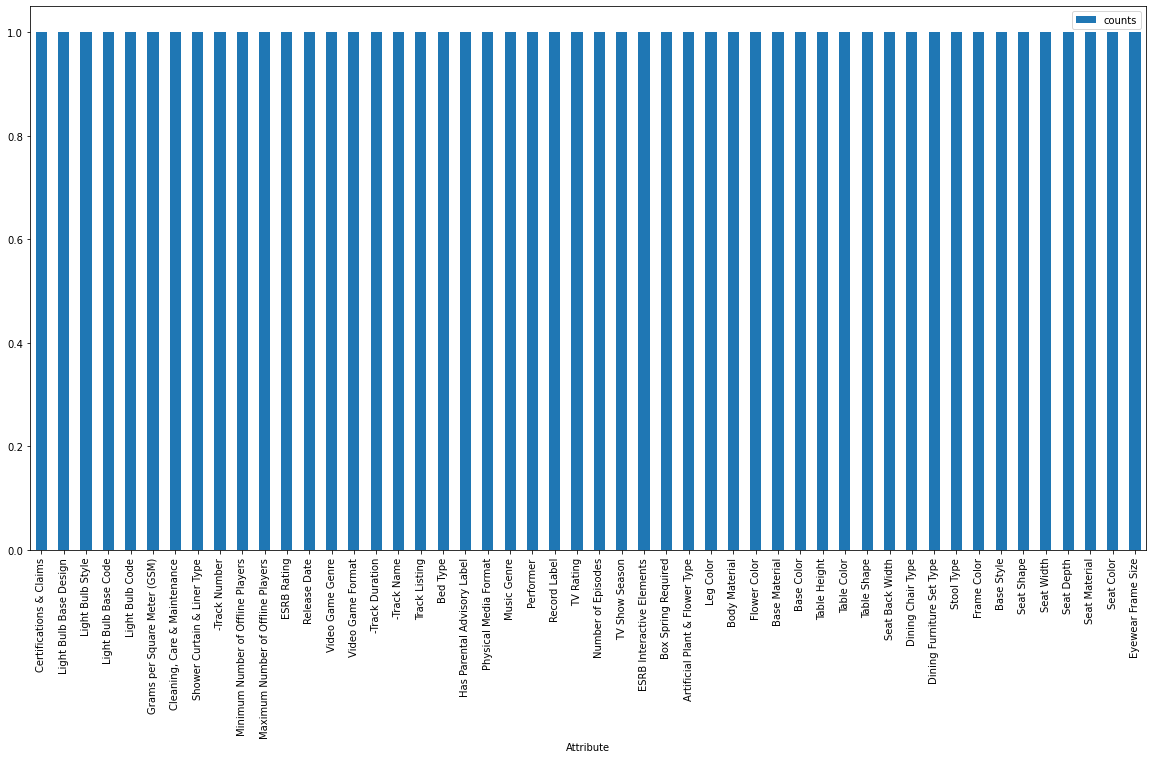

In [24]:
#plot a bar graph of the odf in a wide format of bottom 50 attributes, with attribute labels rotated horizontally
odf[-50:].plot.bar(x='Attribute', y='counts', rot=90, figsize=(20,10))